# Feb 18, 2020

In [1]:
# import the necessary packages
from os import listdir
from os.path import isfile , join
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy import ndimage, signal
from skimage import filters

In [2]:
def rgb2gray(rgb_image):
    return np.dot(rgb_image[...,:3], [0.299, 0.587, 0.114])

In [3]:
def multi_view( images ):
    images_count = len( images ) #count of images (list type)
    fig = plt.figure(figsize=(10,20))
    for row in range( images_count  ):
        ax1 = fig.add_subplot( images_count , 1 , row + 1)
        #ax1.imshow( images[ row ] )
        ax1.imshow(images[ row ], cmap=plt.get_cmap('gray')) # default is viridis 

In [4]:
def gaussian_noise( mu, sigma, im_size ):
    randGaussian=np.random.normal( mu, sigma, im_size) #np.random.normal Gaussian noise
    #print(randUniform) 
    #print(np.mean(randUniform))
    #print(np.std(randUniform))   
    #print('\n')
    
    return randGaussian
    

In [5]:
def im_gaussian_noise(mu, sigma, im):
    g_noise= gaussian_noise(mu,sigma, im.shape)
    img_w_g_noise = im + g_noise
    return img_w_g_noise

In [6]:
images_files = [ join("./images" , f) for f in listdir("images") if isfile(join("images" , f)) ]
#print(images_files)
#print(listdir("images"))
images = [ mpimg.imread( f ) for f in images_files ]
gray_images = [ rgb2gray( img ) for img in images ]
result=[im_gaussian_noise(0, 0.3, img ) for img in gray_images] 
#print(len(result))
#print(len(result[0][0]))

In [7]:
def salt_pepper_noise(img,percent):
    img_noisy=np.zeros(img.shape)
    salt_pepper = np.random.random(img.shape) # Uniform distribution
    
    #print(img.size)
    #print(salt_pepper.size)
    #print((salt_pepper > percent)*1)
    #print(np.sum((salt_pepper > percent)*1)/img.size) #percent clean
    cleanPixels_ind=salt_pepper > percent
    NoisePixels_ind=salt_pepper <= percent
    pepper = (salt_pepper <= (0.5* percent)); # pepper < half percent
    
    salt = ((salt_pepper <= percent) & (salt_pepper > 0.5* percent)); 
    
    #print(np.sum((salt)*1)/img.size)
    #print(cleanPixels_ind.shape)
    #print(img_noisy.shape)
    img_noisy[cleanPixels_ind]=img[cleanPixels_ind]
    img_noisy[pepper] = 0
    img_noisy[salt] = 1
    return img_noisy

In [8]:
def gaussian_Filter(sigma, shape):
    filter=np.zeros(shape)
    filter[1,1]=1
    return ndimage.gaussian_filter(filter, sigma) 

# Salt & Pepper

In [9]:
salt_pepper_noise_imgs = [salt_pepper_noise(grimages,0.7) for grimages in gray_images]

#[multi_view([gray_images[0], salt_pepper_noise_imgs[0]])]

# Gaussian Noise

[None, None, None, None, None, None, None]

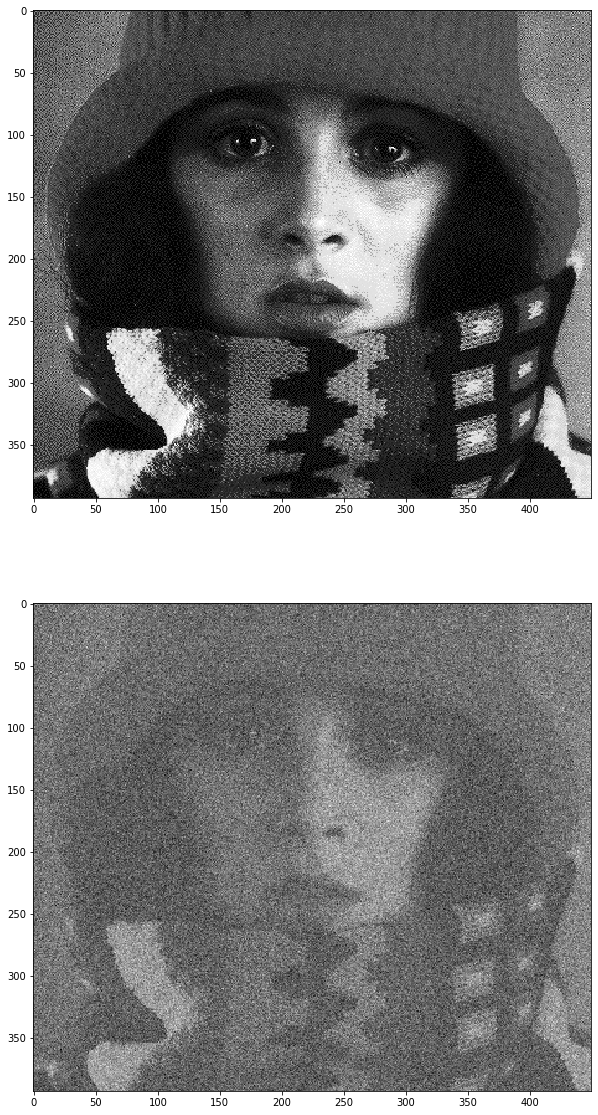

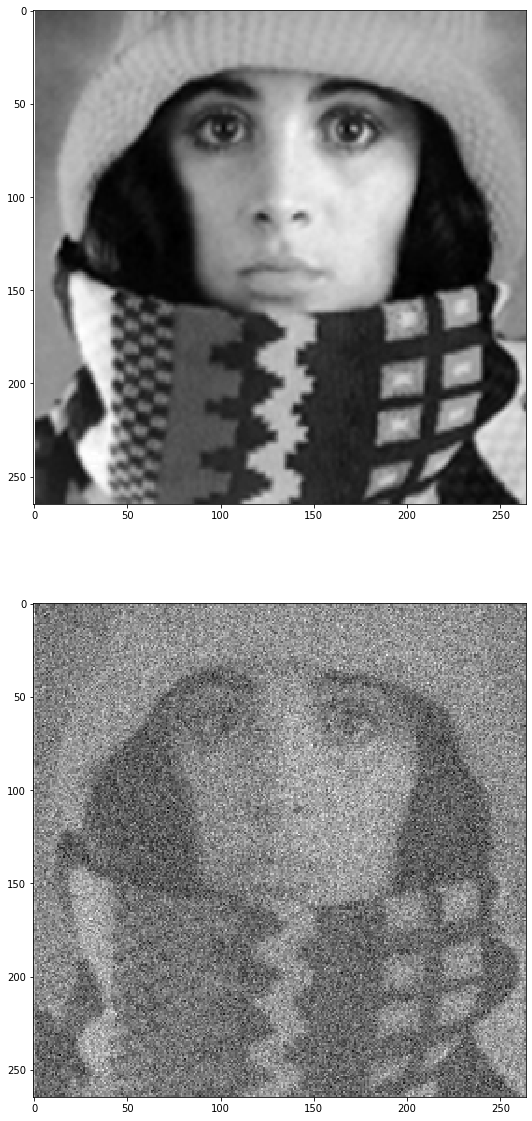

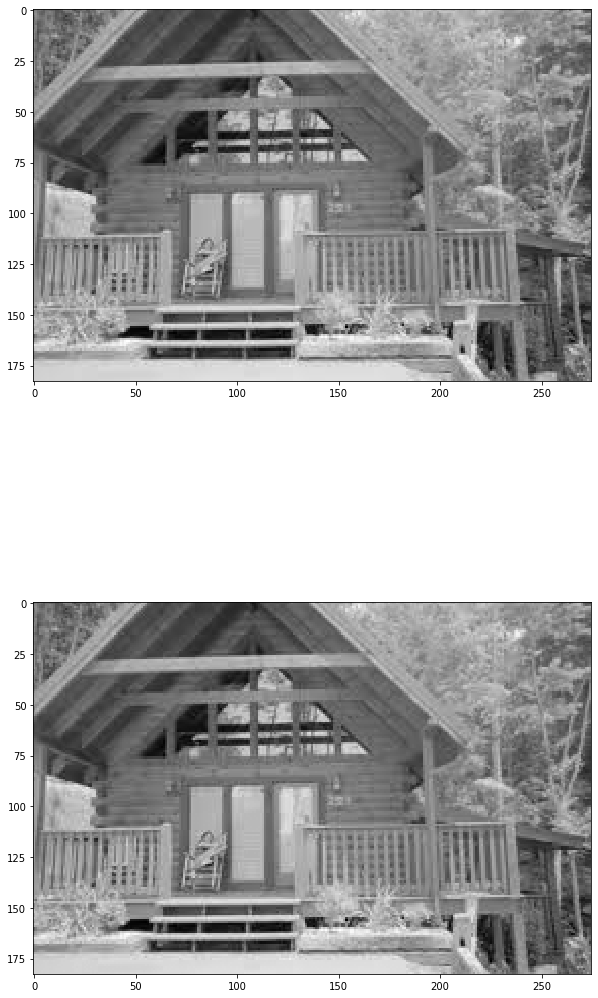

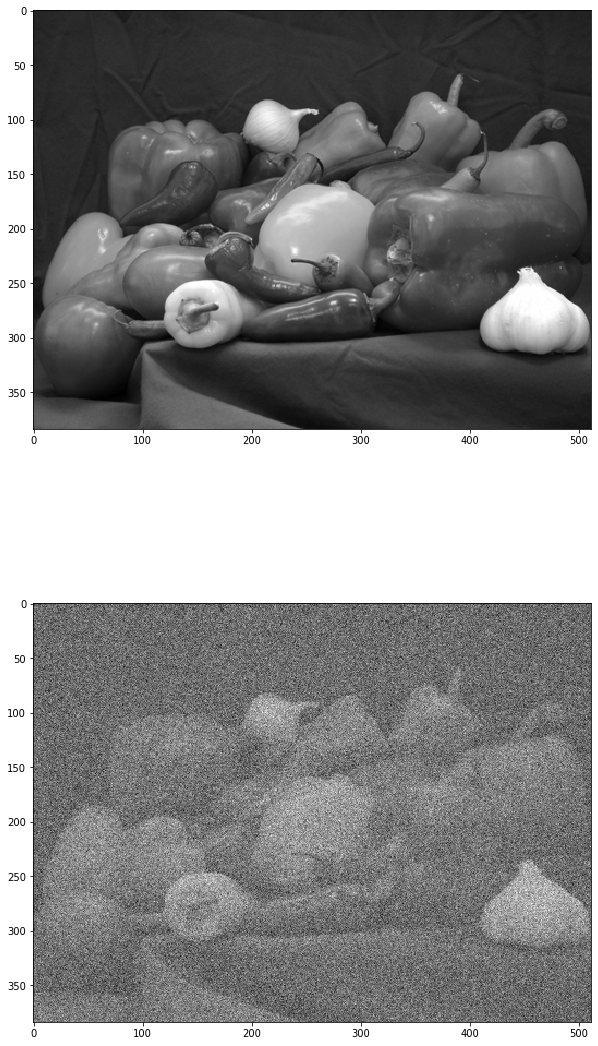

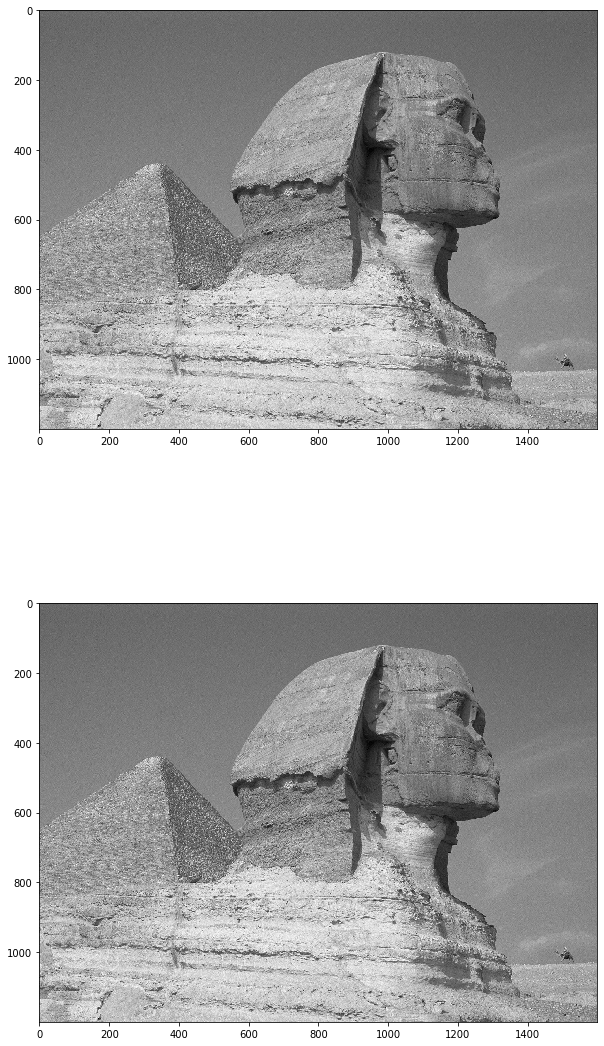

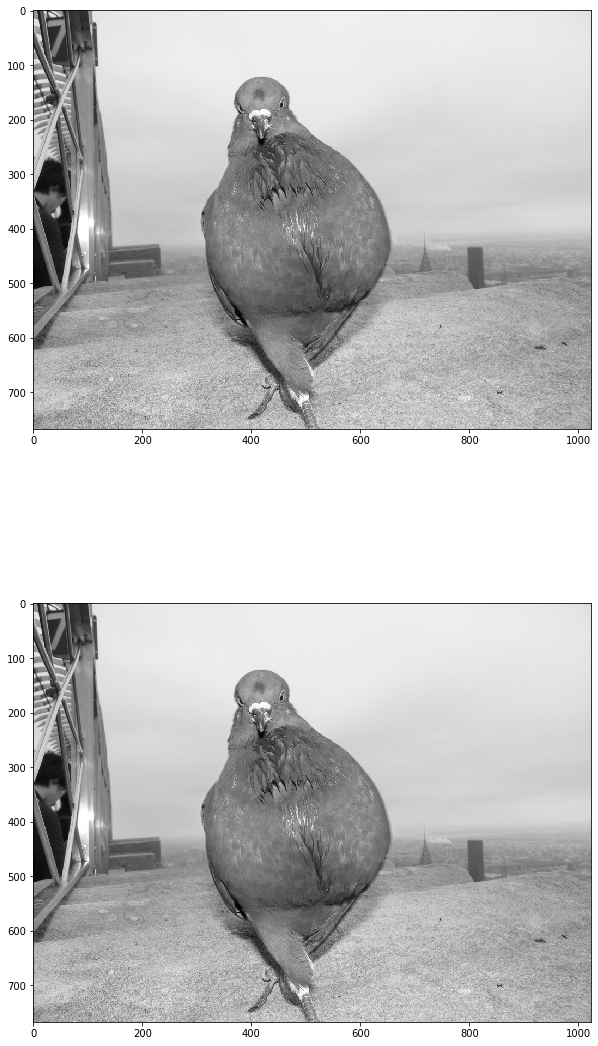

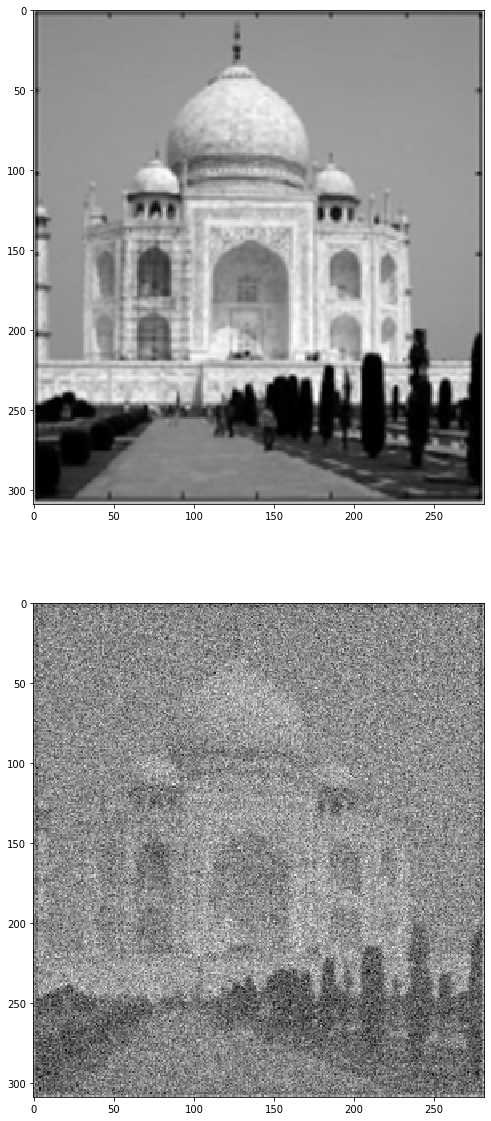

In [10]:
[multi_view(viewNoise) for viewNoise in (list( zip( gray_images , result )))]

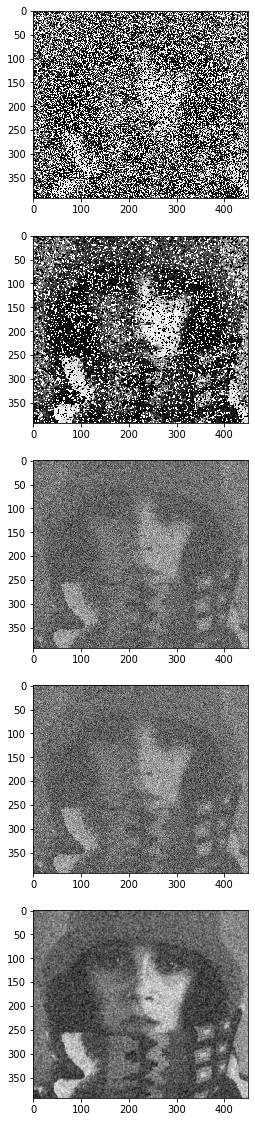

In [11]:
smoothed_gFilter=signal.convolve2d(result[0], gaussian_Filter(0.3, (3,3)), mode='same')
smoothed_boxFilter=signal.convolve2d(result[0], \
                                     [(1/9,1/9,1/9),(1/9,1/9,1/9),(1/9,1/9,1/9)], mode='same')

multi_view([salt_pepper_noise_imgs[0],ndimage.median_filter(salt_pepper_noise_imgs[0],(3,3)),\
            result[0], smoothed_gFilter,smoothed_boxFilter])